My goal with this notebook is to predict popularity using various song qualities. The data comes from requests made to the Spotify API, however, I did not make these requests myself; I got the dataset from Kaggle: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv("data.csv") #read in csv file
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,China,72,5/29/2020,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,10/23/2020,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,AYA,76,11/3/2020,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,Darkness,70,1/17/2020,0.3080,75.055


Here is a copy of the descriptions of the features from the Kaggle page I got the data from (note: I deleted the id column to save space):

Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

In [16]:
df.info() #check if data is in numerical format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   instrumentalness  170653 non-null  float64
 9   key               170653 non-null  int64  
 10  liveness          170653 non-null  float64
 11  loudness          170653 non-null  float64
 12  mode              170653 non-null  int64  
 13  name              170653 non-null  object 
 14  popularity        170653 non-null  int64  
 15  release_date      170653 non-null  object 
 16  speechiness       17

In [17]:
df.isnull().values.any() #check for null values in dataframe

False

The first thing that I noticed was that the songs data back as far as 100 years ago. I wanted to only include more recent songs that I am more familiar with.

Text(0.5, 1.0, 'Year Distribution')

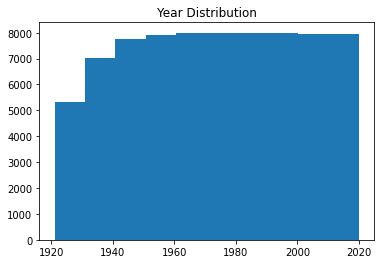

In [5]:
plt.hist(df['year']) #plot year distribution
plt.title('Year Distribution') 

I figured that there is enough data to remove any songs from before the turn of the century.

In [18]:
df = df[df['year'] >= 2000] #remove songs before 2000 from dataframe

In [19]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
15606,0.285,2000,0.00239,['Coldplay'],0.429,266773,0.661,0,0.000121,11,0.2340,-7.227,1,Yellow,84,7/10/2000,0.0281,173.372
15607,0.613,2000,0.14300,['OutKast'],0.843,270507,0.806,1,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,10/31/2000,0.2690,94.948
15608,0.400,2000,0.00958,['Linkin Park'],0.556,216880,0.864,0,0.000000,3,0.2090,-5.870,0,In the End,84,10/24/2000,0.0584,105.143
15609,0.543,2000,0.00664,['3 Doors Down'],0.545,233933,0.865,0,0.000011,11,0.1680,-5.708,0,Kryptonite,78,2000,0.0286,99.009
15610,0.760,2000,0.03020,['Eminem'],0.949,284200,0.661,1,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,5/23/2000,0.0572,104.504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,China,72,5/29/2020,0.0881,105.029
170649,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,10/23/2020,0.0605,137.936
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,AYA,76,11/3/2020,0.0809,91.688
170651,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,Darkness,70,1/17/2020,0.3080,75.055


Before doing anything else, I wanted to check the distribution of my target variable, popularity.

(array([8.8300e+02, 6.0000e+00, 3.1000e+01, 1.6130e+03, 1.1799e+04,
        1.3272e+04, 9.5740e+03, 3.6250e+03, 5.9700e+02, 5.0000e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

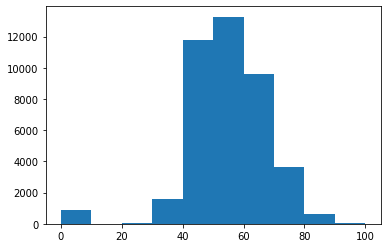

In [20]:
plt.hist(df['popularity']) #plot popularity distribution

As we can see, most songs have a popularity rating between 30 and 80, but there are a few outliers above and below these values. I think that it would be best for my model's overall performance with standard values if I manipulated the popularity values of these outliers. I'm going to scale popularity down by 30 points and consider everything that was previously less than or equal to 30 zero, so that these values don't impact the mae metric as much as they otherwise would. I will also make the new max score 50 after scaling down by 30 points.

In [ ]:
df['popularity'] = df['popularity'] - 30 #scale down by 30 points
df['popularity'] = np.where(df['popularity'] < 0, 0, df['popularity']) #replace negative values with 0
df['popularity'] = np.where(df['popularity'] > 50, 50, df['popularity']) #replace values above 50 with 50

(array([1004., 1529., 5036., 6763., 6892., 6380., 5496., 4078., 2432.,
        1840.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

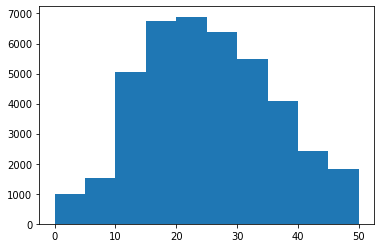

In [22]:
plt.hist(df['popularity']) #plot popularity distribution

As we can see, the target variable now looks roughly normally distributed.

In [26]:
df_numeric = df.select_dtypes(include=np.number) #grab all numeric columns

Text(0.5, 1.0, 'Feature Correlation Heatmap')

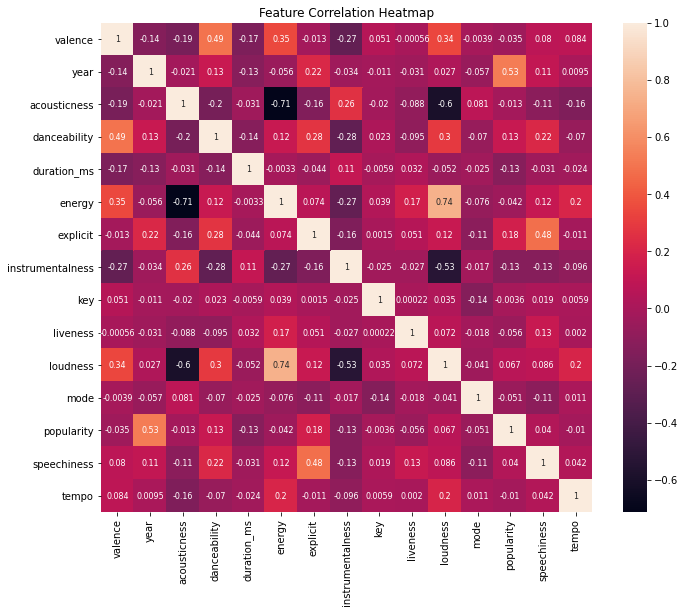

In [80]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_numeric.corr(), annot = True, annot_kws={"fontsize":8}, ax=ax) #plot correlation heatmap
plt.title('Feature Correlation Heatmap')

As we can see, the variable with the most correlation to popularity is year. This makes sense as intuitively, more recent songs will be more popular. The only other variables that seem somewhat related to popularity from this correlation heatmap are explicit, instrumentalness and duration_ms. I also am interested in taking a look at danceability and energy as I feel that those should have somewhat of an impact on how popular a song is from my experience.

Text(0.5, 1.0, 'Median Popularity by Time (Year)')

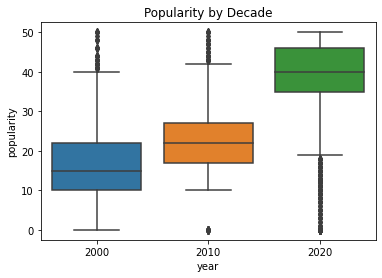

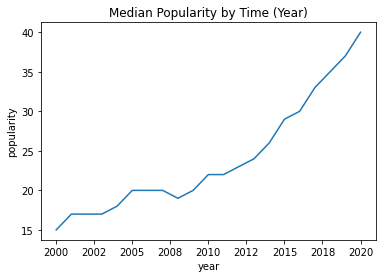

In [28]:
#visualize popularity vs time
sns.boxplot(x=df.loc[df['year'].isin([1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])]['year'], y=df['popularity'])
plt.title("Popularity by Decade")

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f')) #no decimal points in year

plt.plot(df.groupby('year')['popularity'].median())
plt.xlabel("year")
plt.ylabel("popularity")
plt.title("Median Popularity by Time (Year)")

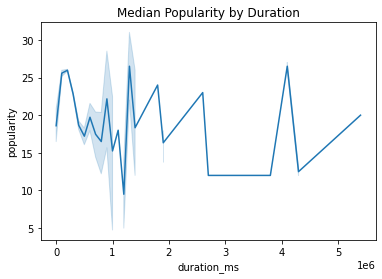

In [29]:
#visualize popularity by duration
plt.figure()
sns.lineplot(x=df['duration_ms'].round(-5), y=df['popularity'])
plt.title("Median Popularity by Duration")
plt.show()

Text(0.5, 1.0, 'Popularity by Energy')

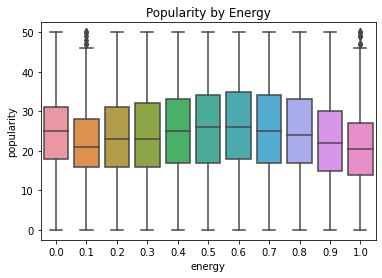

In [30]:
#visualize popularity by energy
plt.figure()
sns.boxplot(x=df['energy'].round(1), y=df['popularity'])
plt.title("Popularity by Energy")

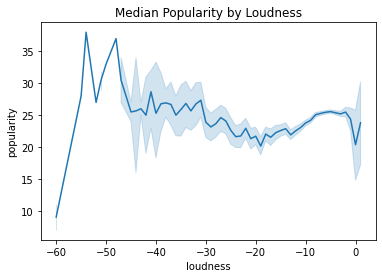

In [31]:
#visualize popularity by loudness
plt.figure()
sns.lineplot(x=df['loudness'].round(0), y=df['popularity'])
plt.title("Median Popularity by Loudness")
plt.show()

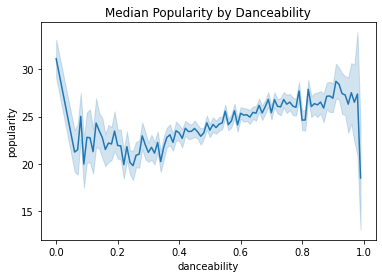

In [32]:
#visualize popularity by danceability
plt.figure()
sns.lineplot(x=df['danceability'].round(2), y=df['popularity'])
plt.title("Median Popularity by Danceability")
plt.show()

Text(0.5, 1.0, 'Popularity by Explicitness')

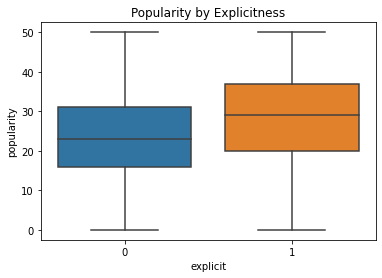

In [33]:
#visualize popularity by explicitness
sns.boxplot(x=df['explicit'], y=df['popularity'])
plt.title("Popularity by Explicitness")

These are the features I decided to select for training:




*   **Year** - I found this to be an obvious choice given the noticable correlation to popularity
*   **Energy** - We can sort of see that songs with energy ratings of 0.6 are generally slightly more popular, and if we go in either direction of this point, popularity decreases. Hopefully, our model can pick up on this.
*   **Explicit** - We can clearly see that explicit songs are generally more popular.
*   **Danceability** - We can see that generally, as dancability increases, popularity increases, with some exceptions at the edges, likely due to changes made to the data to help with the issue of dealing with outliers.



In [ ]:
#format data for training
X = df[['year', 'energy', 'explicit', 'danceability']]
y = df[['popularity']] #target

X.year = X.year.astype(float)
min_year = X['year'].min()
X['year'] = X['year'] - min_year + 1 #scale down year a bit

y.popularity = y.popularity.astype(float)

print(X.info())
print(y.info())

I want to get cross validation scores from various regression models to see how well they perform. I will also get feature importance from XGBoost to reevaluate whether or not I made the right choices

In [35]:
#import sklearn regression models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [36]:
#linear regression
scale = StandardScaler() #scale data
model = LinearRegression()
pipeline = Pipeline(steps=[('scaler', scale), ('model', model)])
n_scores = cross_val_score(pipeline, X, y, cv = 5, scoring='neg_mean_absolute_error')
print(n_scores.mean())

-8.036390448582653


In [37]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [38]:
#ridge regression
scale = StandardScaler() #scale data
model = Ridge()
pipeline = Pipeline(steps=[('scaler', scale), ('model', model)])
n_scores = cross_val_score(pipeline, X, y, cv = 5, scoring='neg_mean_absolute_error')
print(n_scores.mean())

-8.036404757900153


In [39]:
#lasso regression
scale = StandardScaler() #scale data
model = Lasso()
pipeline = Pipeline(steps=[('scaler', scale), ('model', model)])
n_scores = cross_val_score(pipeline, X, y, cv = 5, scoring='neg_mean_absolute_error')
print(n_scores.mean())

-8.180394476269916


In [40]:
#elastic regression
scale = StandardScaler() #scale data
model = ElasticNet()
pipeline = Pipeline(steps=[('scaler', scale), ('model', model)])
n_scores = cross_val_score(pipeline, X, y, cv = 5, scoring='neg_mean_absolute_error')
print(n_scores.mean())

-8.425213635559997


In [41]:
from xgboost import XGBRegressor

In [42]:
#xgboost regression
scale = MinMaxScaler() #scale data
model = XGBRegressor(objective='reg:squarederror')
pipeline = Pipeline(steps=[('scaler', scale), ('model', model)])
n_scores = cross_val_score(pipeline, X, y, cv = 5, scoring='neg_mean_absolute_error')
print(n_scores.mean())

-7.8785430346006935


In [43]:
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='reg:squarederror',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
         verbose=False)

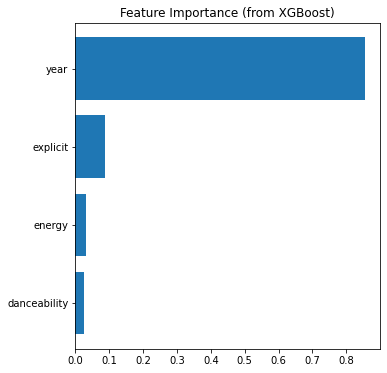

[0.8562688  0.03075593 0.0871103  0.02586494]


In [44]:
#plot feature importance chart
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (from XGBoost)')
plt.show()
print(feature_importance)

As somewhat expected, XGBoost is mostly relying on year to make a prediction, which isn't really the worst thing since it isn't performing all that bad. I think I will keep the other two features going into building a neural network in case they have more of an impact there

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #split to training and testing data

In [47]:
#scale data
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [49]:
#import libraries for neural network
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint

In [68]:
#build neural network
model = tf.keras.Sequential([
  Dense(32, input_shape=[X_train.shape[1]], activation='relu'),
  Dense(32, activation='relu'),
  Dense(1, activation='linear')                         
])


In [69]:
#run model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
972/972 [==============================] - 2s 2ms/step - loss: 312.4860 - mae: 13.8109 - val_loss: 86.7712 - val_mae: 7.0803
Epoch 2/3
972/972 [==============================] - 1s 1ms/step - loss: 87.0036 - mae: 7.0786 - val_loss: 85.0642 - val_mae: 6.9941
Epoch 3/3
972/972 [==============================] - 1s 2ms/step - loss: 83.7877 - mae: 6.9110 - val_loss: 84.7579 - val_mae: 6.9876


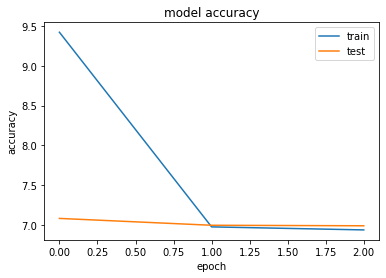

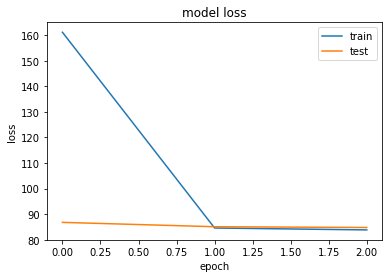

In [70]:
#plot history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

As we can see, after just 3 epochs, a simple neural network outperforms the rest of the models by a noticable margin. This is definitely the model I would go with to make predictions.

In [71]:
y_pred = model.predict(X_test)

In [72]:
import random

In [73]:
#take a sample of predictions from the testing data for plotting
pred_sample = []
actual_sample = []
for i in range(500): 
  index = random.randint(0, len(y_pred) - 1)
  pred_sample.append(int(y_pred[index]))
  actual_sample.append(int(y_test[index]))

Text(0.5, 1.0, 'Sample of 500 Predicted vs. Actual Values')

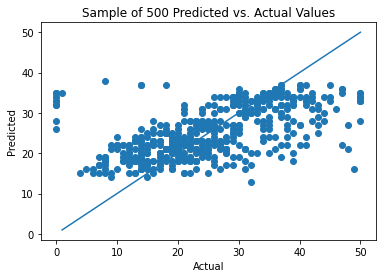

In [74]:
#compare predictions to actual values
plt.scatter(actual_sample, pred_sample)
plt.plot(range(1,51), range(1,51))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Sample of 500 Predicted vs. Actual Values")

Below we can enter the information for any song and get a prediction from the neural network:

In [79]:
year = 2014 #ENTER YEAR HERE (2000-2020)
energy = 0.5483 #ENTER ENERGY HERE (0-1)
explicit = 1 #ENTER EXPLICIT HERE (0 or 1)
danceability = 0.786 #ENTER DANCEABILITY HERE (0-1)

year = year - min_year + 1
year = float(year)
data_for_prediction = [[year, energy, explicit, danceability]]
data_for_prediction = scaler.transform(data_for_prediction)
print("our prediction for popularity of the song with the given feature values is", int(round(model.predict(data_for_prediction)[0][0], 0)), "out of a maximum score of 50")

our prediction for popularity of the song with the given feature values is 30 out of a maximum score of 50
